<a href="https://colab.research.google.com/github/niplessa/Thesis_Data-mining-study-on-medical-and-sociological-Data-regarding-Covid19/blob/main/Classification3_based_on_paper%5B5%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

##Work based on paper [5]: "COVID-19 Patient Health Prediction Using Boosted Random Forest Algorithm"
- paper link: https://www.frontiersin.org/articles/10.3389/fpubh.2020.00357/full

- Dataset: https://github.com/niplessa/Datasets/blob/main/paper5_patient_info.csv

- Goal: Predict if a patient will **recover or die** based on variables like sex, age, day hospitalized, symptoms etc

#Dataset Import and Exploration

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
#label encoding
from sklearn import preprocessing
#models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
#Dataset import
path = "https://raw.githubusercontent.com/niplessa/Datasets/main/paper5_patient_info.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,1,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Shanghai,China,female,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zhejiang,China,male,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tianjin,China,female,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Tianjin,China,male,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(1085, 17)

In [ ]:
data.info

<bound method DataFrame.info of         id             location      country  ... symptom4  symptom5 symptom6
0        1  Shenzhen, Guangdong        China  ...      NaN       NaN      NaN
1        2             Shanghai        China  ...      NaN       NaN      NaN
2        3             Zhejiang        China  ...      NaN       NaN      NaN
3        4              Tianjin        China  ...      NaN       NaN      NaN
4        5              Tianjin        China  ...      NaN       NaN      NaN
...    ...                  ...          ...  ...      ...       ...      ...
1080  1081            Innsbruck      Austria  ...      NaN       NaN      NaN
1081  1082          Afghanistan  Afghanistan  ...      NaN       NaN      NaN
1082  1083              Algeria      Algeria  ...      NaN       NaN      NaN
1083  1084              Croatia      Croatia  ...      NaN       NaN      NaN
1084  1085                 Bern  Switzerland  ...      NaN       NaN      NaN

[1085 rows x 17 columns]>

In [ ]:
data.describe()

,id,age,vis_wuhan,from_wuhan,death,recov
count,1085.000000,843.000000,1085.000000,1081.000000,1085.000000,1085.000000
mean,543.000000,49.483689,0.176959,0.144311,0.058065,0.146544
std,313.356825,18.255334,0.381810,0.351567,0.233973,0.353814
min,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,543.000000,51.000000,0.000000,0.000000,0.000000,0.000000
75%,814.000000,64.000000,0.000000,0.000000,0.000000,0.000000
max,1085.000000,96.000000,1.000000,1.000000,1.000000,1.000000


## Plots and frequencies of the variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

In [ ]:
#create new variable age group to plot
def age_group(row):
    if (row['age']>0) and (row['age']<=10):
        val = "0s"
    elif (row['age']>=10) and (row['age']<20):
        val = "10s"
    elif (row['age']>=20) and (row['age']<30):
        val ="20s"
    elif (row['age']>=30) and (row['age']<40):
        val ="30s"
    elif (row['age']>=40) and (row['age']<50):
        val ="40s"
    elif (row['age']>=50) and (row['age']<60):
        val ="50s"
    elif (row['age']>=60) and (row['age']<70):
        val ="60s"
    elif (row['age']>=70) and (row['age']<80):
        val ="70s"
    elif (row['age']>=80) and (row['age']<90):
        val ="80s"
    elif (row['age']>=90) and (row['age']<100):
        val ="90s"
    else:
      val = "NaN"

    
    return val


In [ ]:
data['age_group'] = data.apply(age_group,axis=1)

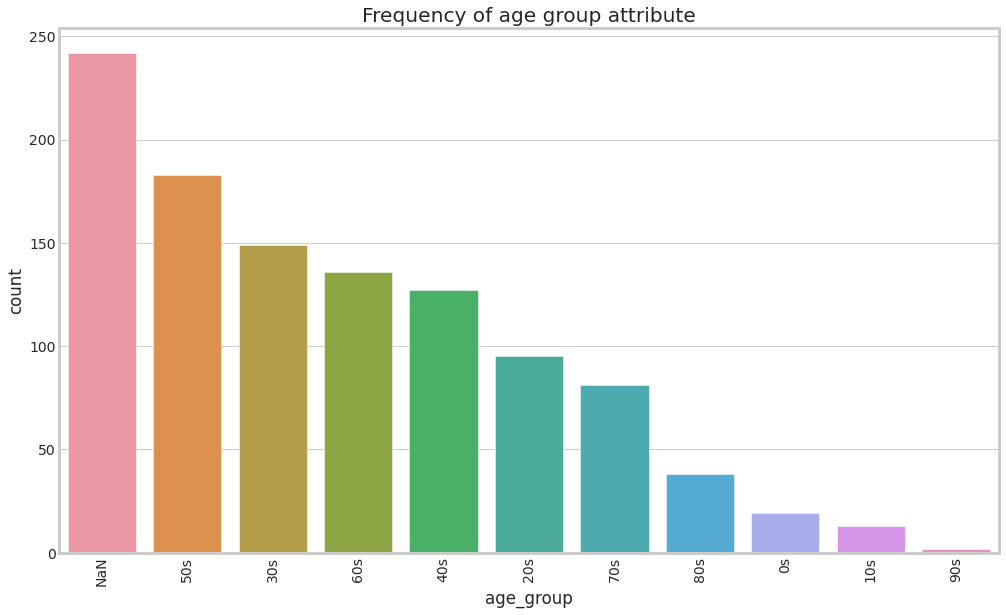

In [ ]:
plt.figure(figsize=[15,9])
plt.title("Frequency of age group attribute")
#freq = sns.countplot(df['infection_case'])
freq = sns.countplot(x = 'age_group',
              data = data,
              order = data['age_group'].value_counts().index)
plt.setp(freq.get_xticklabels(), rotation=90)
plt.show()


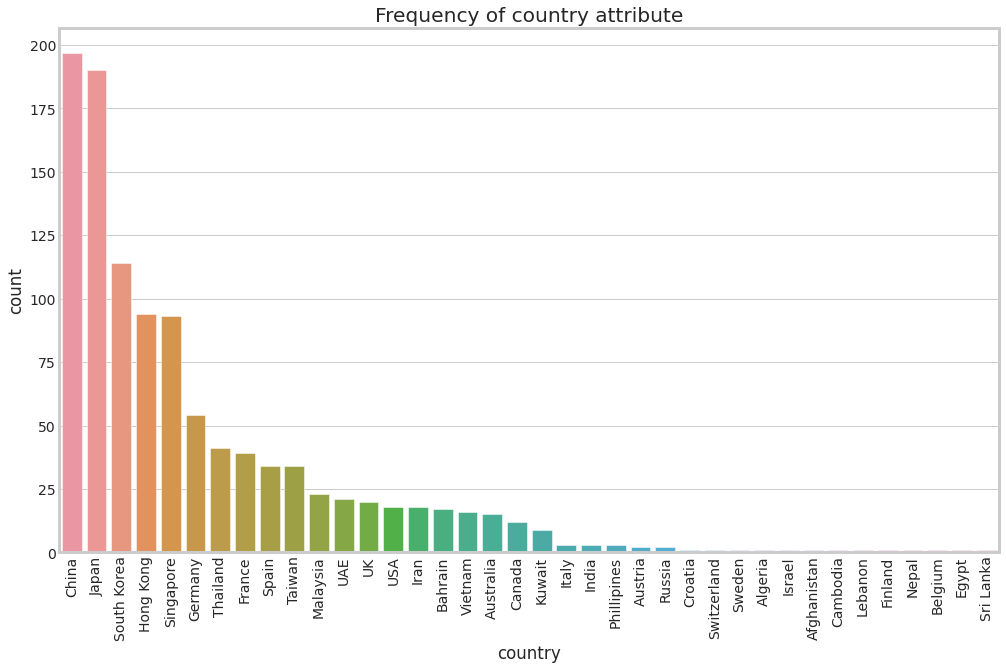

In [ ]:
plt.figure(figsize=[15,9])
plt.title("Frequency of country attribute")
#freq = sns.countplot(df['infection_case'])
freq = sns.countplot(x = 'country',
              data = data,
              order = data['country'].value_counts().index)
plt.setp(freq.get_xticklabels(), rotation=90)
plt.show()


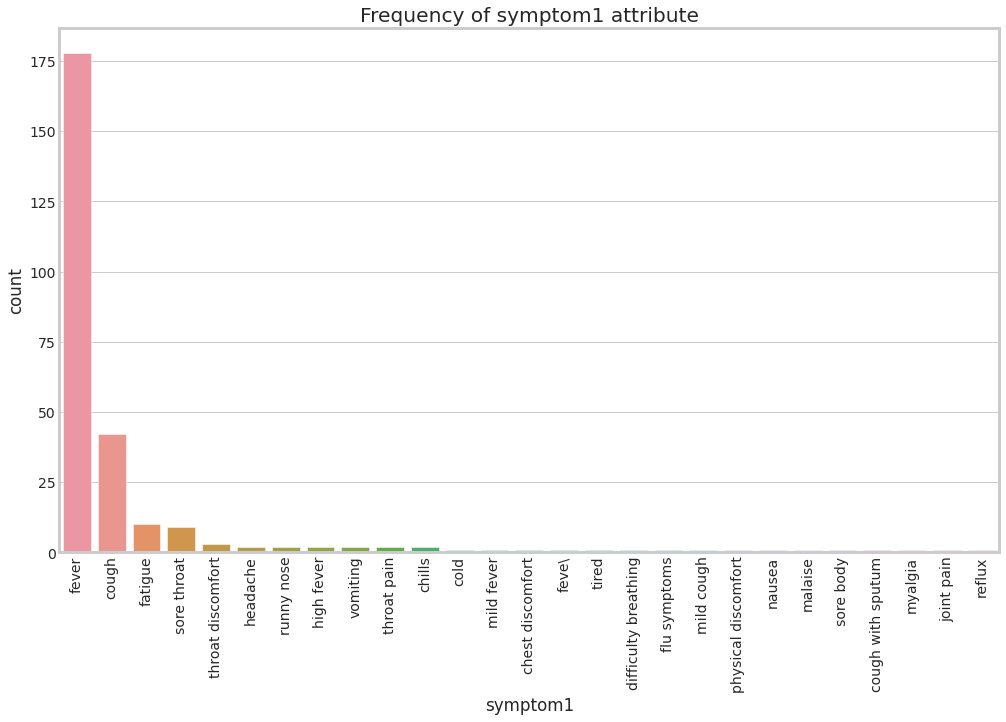

In [ ]:
plt.figure(figsize=[15,9])
plt.title("Frequency of symptom1 attribute")
#freq = sns.countplot(df['infection_case'])
freq = sns.countplot(x = 'symptom1',
              data = data,
              order = data['symptom1'].value_counts().index)
plt.setp(freq.get_xticklabels(), rotation=90)
plt.show()


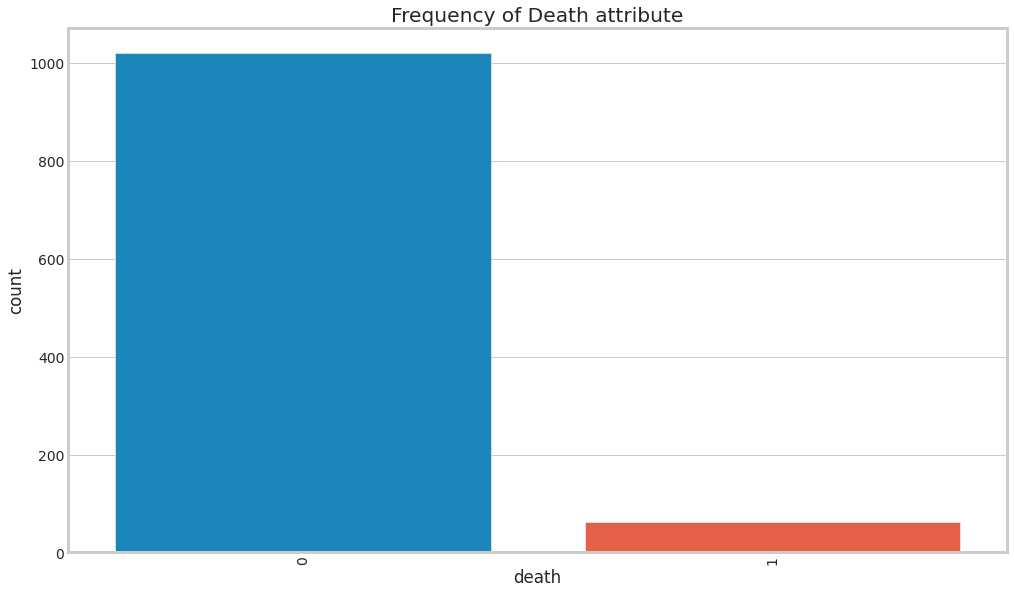

In [ ]:
plt.figure(figsize=[15,9])
plt.title("Frequency of Death attribute")
#freq = sns.countplot(df['infection_case'])
freq = sns.countplot(x = 'death',
              data = data,
              order = data['death'].value_counts().index)
plt.setp(freq.get_xticklabels(), rotation=90)
plt.show()


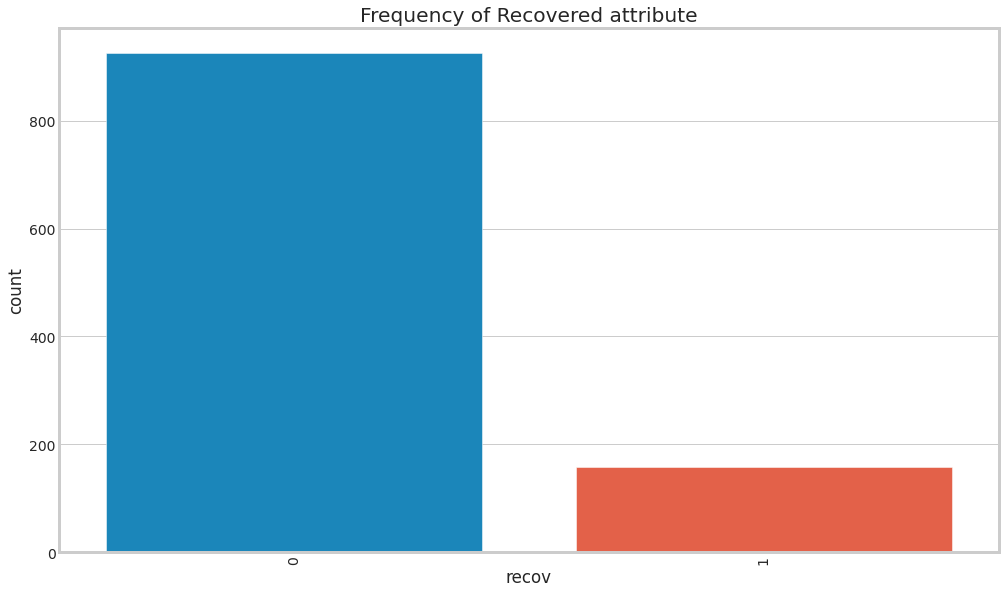

In [ ]:
plt.figure(figsize=[15,9])
plt.title("Frequency of Recovered attribute")
#freq = sns.countplot(df['infection_case'])
freq = sns.countplot(x = 'recov',
              data = data,
              order = data['recov'].value_counts().index)
plt.setp(freq.get_xticklabels(), rotation=90)
plt.show()


## Data preproccesing
- Drop unnecesary columns (like id)
- Convert categorical to numerical values (label encoding)
- Feature enginnering -> Create new vars from existing columns

In [ ]:
encoder = preprocessing.LabelEncoder()

In [ ]:
data = data.drop("id",axis=1) #drop id
#data = data.fillna(np.nan,axis=0) 

#label encoding
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data['symptom1'] = encoder.fit_transform(data['symptom1'].astype(str))
data['symptom2'] = encoder.fit_transform(data['symptom2'].astype(str))
data['symptom3'] = encoder.fit_transform(data['symptom3'].astype(str))
data['symptom4'] = encoder.fit_transform(data['symptom4'].astype(str))
data['symptom5'] = encoder.fit_transform(data['symptom5'].astype(str))
data['symptom6'] = encoder.fit_transform(data['symptom6'].astype(str))

In [ ]:
data.head()

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,age_group
0,116,8,1,66.0,1/3/2020,1/11/2020,1,0.0,0,0,17,31,23,12,3,1,60s
1,113,8,0,56.0,1/15/2020,1/15/2020,0,1.0,0,0,17,31,23,12,3,1,50s
2,154,8,1,46.0,1/4/2020,1/17/2020,0,1.0,0,0,17,31,23,12,3,1,40s
3,129,8,0,60.0,NaN,NaN,1,0.0,0,0,17,31,23,12,3,1,60s
4,129,8,1,58.0,NaN,NaN,0,0.0,0,0,17,31,23,12,3,1,50s


In [ ]:
#convert to datetime
data['sym_on'] = pd.to_datetime(data['sym_on']) 
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
#convert to ordinal, so NaN values will be 1
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
#no of days between first symptoms and hospitalization (new variable)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

#drop the date values as they are not longer needed
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [ ]:
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,age_group,diff_sym_hos
0,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,60s,8
1,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,50s,0
2,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,40s,13
3,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,60s,0
4,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,50s,0


In [ ]:
#check data types for each column
print(data.dtypes)

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan      float64
death             int64
recov             int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
age_group        object
diff_sym_hos      int64
dtype: object


#Classification

## Split the dataset into training and test
We keep as train dataset the rows that in death or recov have at least one "1" and as test dataset the rows that death&recov are both "0" (unknown outcome).

In [ ]:
test = data[(data['death']==0) & (data['recov']==0)] #
data = pd.concat([data, test, test]).drop_duplicates(keep=False)

In [ ]:
print("Training dataset size:",data.shape)

Training dataset size: (207, 16)


In [ ]:
#check for Nan in training dataset
data.isna().sum()

location         0
country          0
gender           0
age             10
vis_wuhan        0
from_wuhan       0
death            0
recov            0
symptom1         0
symptom2         0
symptom3         0
symptom4         0
symptom5         0
symptom6         0
age_group        0
diff_sym_hos     0
dtype: int64

We fill the NaNs in age with mean value, they are only 10 so it won't change the result dramatically.

In [ ]:
data = data.fillna(data.mean())

In [ ]:
X = data.drop(['location','death','recov','age_group'],axis=1)
y = data['death']
#strat = train['death']#.astype(str) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42) #split 70-30


#Models

### At first run we'll run the models without hypertuning (with default parameters). We'll evaluate which one performs better and then hypertune its paramaters with SVgrid.

- Since the dataset is heavily imbalanced we will use F1 score as our primary metric.

In [ ]:
model_scores = [] #list that will hold f1 score for each model

## Decision Tree Classifier

In [ ]:
#Decsion Tree classifier

#hyper parameter tuning using GridSearch
from sklearn import tree
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = {"criterion" : criterion,
              "max_depth" : max_depth}

clf = tree.DecisionTreeClassifier(random_state=42)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("\nClassification report for Decision Trees on test")
print(classification_report(y_test, y_pred))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Deceased (TN) = {} , False Relased (FP) = {}, False  Deceased (FN) = {}, True Released (TP) = {}".format(tn,fp,fn,tp))

labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels)

# CM visualization
cm


Classification report for Decision Trees on test
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.85      0.58      0.69        19

    accuracy                           0.84        63
   macro avg       0.84      0.77      0.79        63
weighted avg       0.84      0.84      0.83        63

True Deceased (TN) = 42 , False Relased (FP) = 2, False  Deceased (FN) = 8, True Released (TP) = 11


,0,1
0,42,2
1,8,11


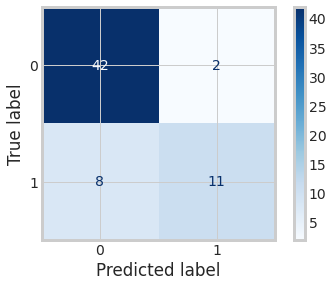

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
                                 
plt.show()

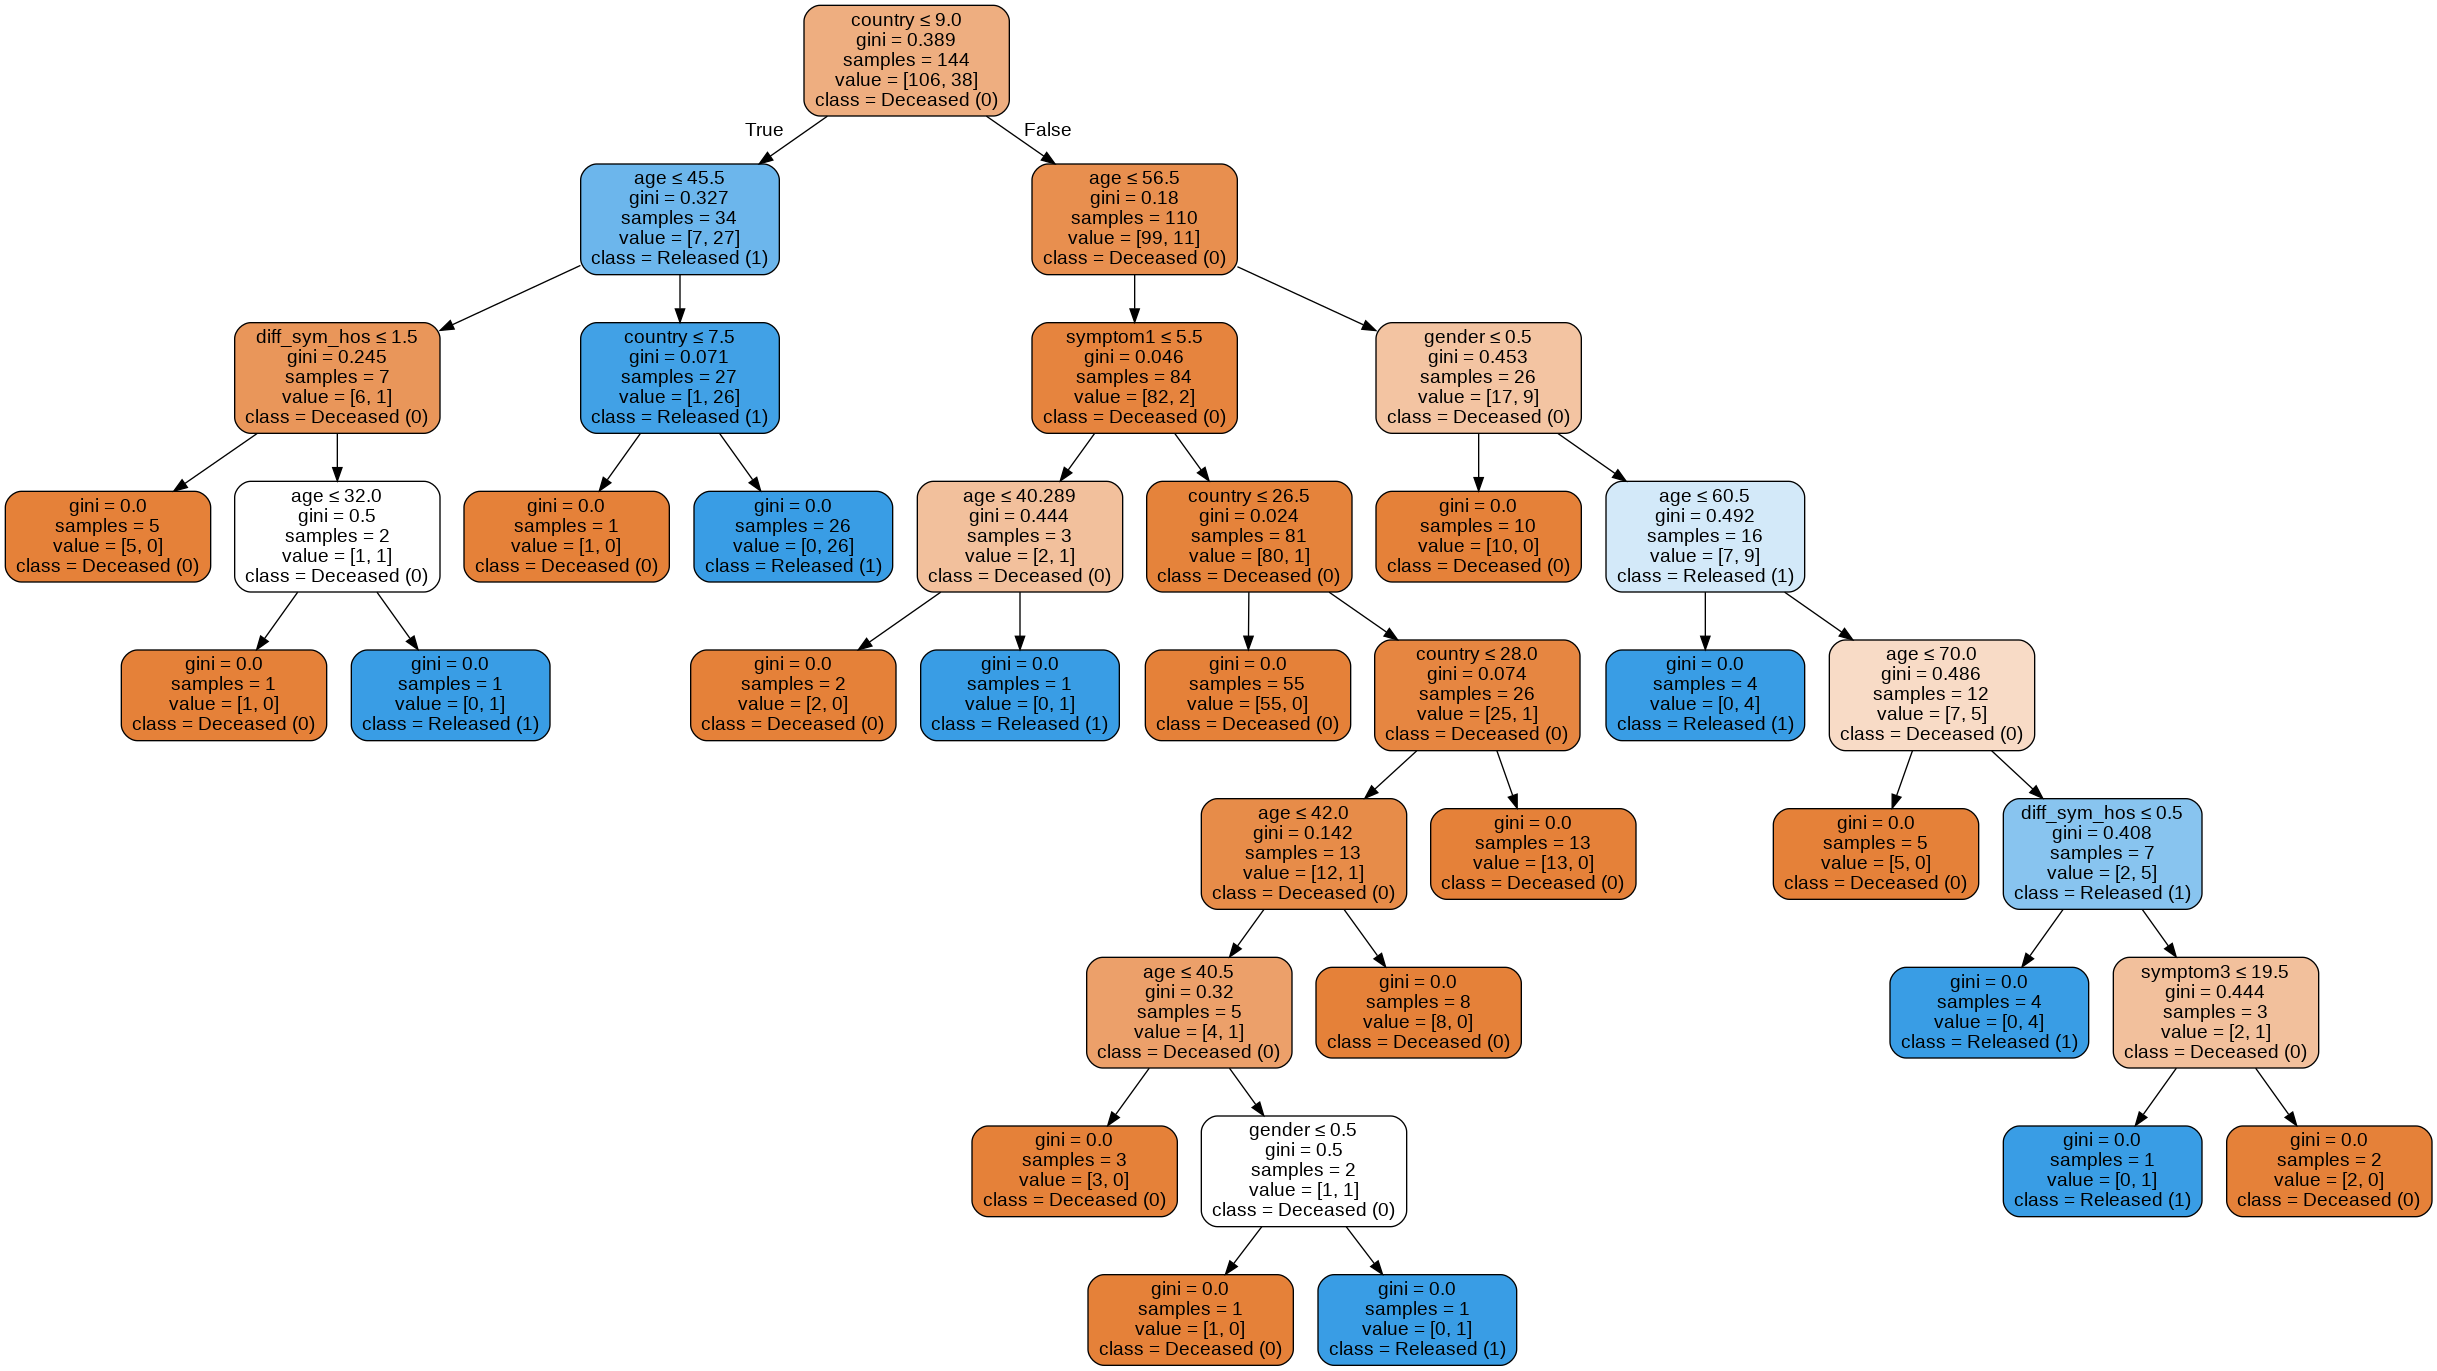

In [ ]:
feats = X.columns

#visualize tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=feats,class_names=['Deceased (0)','Released (1)'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covidDT.png')
Image(graph.create_png())

In [ ]:
#evaluate metrics for DT
recall_dt = rs(y_test,y_pred)
precision_dt = ps(y_test,y_pred)
f1_dt = fs(y_test,y_pred)
ma_dt = clf.score(X_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dt)
print('Precision Score: ',precision_dt)
print('F1 Score: ',f1_dt)
print('Accuracy: ',ma_dt)

*** Evaluation metrics for test dataset ***

Recall Score:  0.5789473684210527
Precision Score:  0.8461538461538461
F1 Score:  0.6875
Accuracy:  0.8412698412698413


In [ ]:
model_scores.append(fs(y_test, y_pred, average='macro'))

## SVM Classifier

In [ ]:
from sklearn import svm

parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10],
              'class_weight': [{1: 1}, {1: 2}, {1: 5}, {1: 10}, {1: 15}]
              }

clf = svm.SVC(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("\nClassification report for SVM on test")
print(classification_report(y_test, y_pred))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Deceased (TN) = {} , False Relased (FP) = {}, False  Deceased (FN) = {}, True Released (TP) = {}".format(tn,fp,fn,tp))

labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels)

# CM visualization
cm


Classification report for SVM on test
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        44
           1       0.93      0.68      0.79        19

    accuracy                           0.89        63
   macro avg       0.90      0.83      0.86        63
weighted avg       0.89      0.89      0.88        63

True Deceased (TN) = 43 , False Relased (FP) = 1, False  Deceased (FN) = 6, True Released (TP) = 13


,0,1
0,43,1
1,6,13


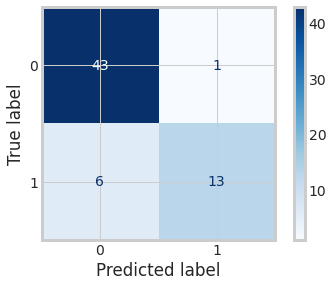

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
                                 
plt.show()

In [ ]:
#evaluate metrics for SVM
recall_svm = rs(y_test,y_pred)
precision_svm = ps(y_test,y_pred)
f1_svm = fs(y_test,y_pred)
ma_svm = clf.score(X_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dt)
print('Precision Score: ',precision_dt)
print('F1 Score: ',f1_dt)
print('Accuracy: ',ma_dt)


*** Evaluation metrics for test dataset ***

Recall Score:  0.5789473684210527
Precision Score:  0.8461538461538461
F1 Score:  0.6875
Accuracy:  0.8412698412698413


In [ ]:
model_scores.append(fs(y_test, y_pred, average='macro'))

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification report for KNN clasifier on test")
print(classification_report(y_test, y_pred))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Deceased (TN) = {} , False Relased (FP) = {}, False  Deceased (FN) = {}, True Released (TP) = {}".format(tn,fp,fn,tp))

labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels)

# CM visualization
cm


Classification report for KNN clasifier on test
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.83      0.79      0.81        19

    accuracy                           0.89        63
   macro avg       0.87      0.86      0.87        63
weighted avg       0.89      0.89      0.89        63

True Deceased (TN) = 41 , False Relased (FP) = 3, False  Deceased (FN) = 4, True Released (TP) = 15


,0,1
0,41,3
1,4,15


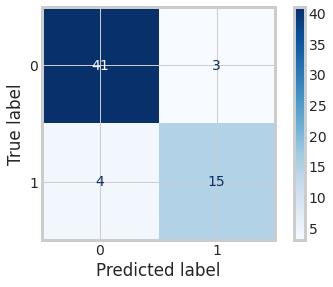

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
                                 
plt.show()

In [ ]:
#evaluate metrics for KNN
recall_knn = rs(y_test,y_pred)
precision_knn = ps(y_test,y_pred)
f1_knn = fs(y_test,y_pred)
ma_knn = clf.score(X_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_knn)
print('Precision Score: ',precision_knn)
print('F1 Score: ',f1_knn)
print('Accuracy: ',ma_knn)


*** Evaluation metrics for test dataset ***

Recall Score:  0.7894736842105263
Precision Score:  0.8333333333333334
F1 Score:  0.8108108108108109
Accuracy:  0.8888888888888888


In [ ]:
model_scores.append(fs(y_test, y_pred, average='macro'))

#Ensemble Models

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


parameters = {'n_estimators': [50, 100, 200], 
              'max_depth': [3, 5, 10, 15],
              'max_features': [0.6, 0.8, 1.0],
              'class_weight': [{1: 1}, {1: 2}, {1: 5}, {1: 10}, {1: 15}]
              }

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("\nClassification report for Random Forest on test")
print(classification_report(y_test, y_pred))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Deceased (TN) = {} , False Relased (FP) = {}, False  Deceased (FN) = {}, True Released (TP) = {}".format(tn,fp,fn,tp))

labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels)

# CM visualization
cm


Classification report for Random Forest on test
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       1.00      0.68      0.81        19

    accuracy                           0.90        63
   macro avg       0.94      0.84      0.87        63
weighted avg       0.92      0.90      0.90        63

True Deceased (TN) = 44 , False Relased (FP) = 0, False  Deceased (FN) = 6, True Released (TP) = 13


,0,1
0,44,0
1,6,13


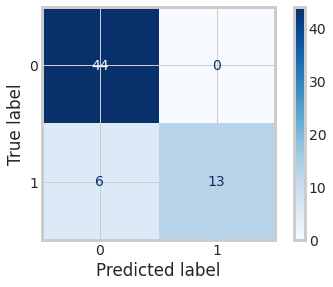

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
                                 
plt.show()

In [ ]:
model_scores.append(fs(y_test, y_pred, average='macro'))

## Αdaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("\nClassification report for Adaboost on test")
print(classification_report(y_test, y_pred))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Deceased (TN) = {} , False Relased (FP) = {}, False  Deceased (FN) = {}, True Released (TP) = {}".format(tn,fp,fn,tp))

labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels)

# CM visualization
cm


Classification report for Adaboost on test
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.87      0.68      0.76        19

    accuracy                           0.87        63
   macro avg       0.87      0.82      0.84        63
weighted avg       0.87      0.87      0.87        63

True Deceased (TN) = 42 , False Relased (FP) = 2, False  Deceased (FN) = 6, True Released (TP) = 13


,0,1
0,42,2
1,6,13


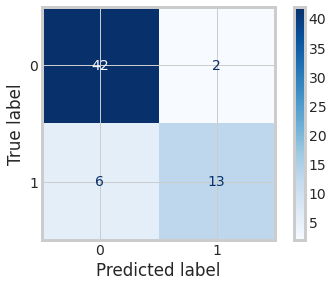

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
                                 
plt.show()

In [ ]:
#evaluate metrics for KNN
recall_ada = rs(y_test,y_pred)
precision_ada = ps(y_test,y_pred)
f1_ada = fs(y_test,y_pred)
ma_ada = clf.score(X_test,y_test)

print('*** Adaboost Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_ada)
print('Precision Score: ',precision_ada)
print('F1 Score: ',f1_ada)
print('Accuracy: ',ma_ada)


*** Adaboost Evaluation metrics for test dataset ***

Recall Score:  0.6842105263157895
Precision Score:  0.8666666666666667
F1 Score:  0.7647058823529413
Accuracy:  0.873015873015873


In [ ]:
model_scores.append(fs(y_test, y_pred, average='macro'))

# Models F1 Scores

In [ ]:
model_names=["Decision Tree","SVM","KNN","Random Forest","Adaboost"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","F1 Score (macro)"]).sort_values(["F1 Score (macro)"],ascending=False)
model_summary.reset_index(drop=True)


,Model Name,F1 Score (macro)
0,Random Forest,0.874335
1,KNN,0.866080
2,SVM,0.856305
3,Adaboost,0.838875
4,Decision Tree,0.790559


## Evaluation:
- Random Forest has the best F1 score from all the models (slightly higher than simple DT trees).

**Let's hypertune it using SVgrid**

#Hypertune parameters for Random Forest Classifier

In [ ]:
parameters = {'n_estimators': [50, 100, 200], 
              'max_depth': [3, 5, 10, 15],
              'max_features': [0.6, 0.8, 1.0],
              'class_weight': [{1: 1}, {1: 2}, {1: 5}, {1: 10}, {1: 15}]
              }

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print("Best estimator is:"+str(grid_search.best_params_))
print("F1-Score (macro avg) on train: "+"{0:.2%}".format(grid_search.best_score_))

y_pred = grid_search.best_estimator_.predict(X_test)

print("\nClassification report for Random Forest on test")
print(classification_report(y_test, y_pred))

Best estimator is:{'class_weight': {1: 2}, 'max_depth': 10, 'max_features': 0.6, 'n_estimators': 100}
F1-Score (macro avg) on train: 92.82%

Classification report for Random Forest on test
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       1.00      0.68      0.81        19

    accuracy                           0.90        63
   macro avg       0.94      0.84      0.87        63
weighted avg       0.92      0.90      0.90        63



In [ ]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Deceased (TN) = {} , False Relased (FP) = {}, False  Deceased (FN) = {}, True Released (TP) = {}".format(tn,fp,fn,tp))

labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels)

# CM visualization
cm

True Deceased (TN) = 44 , False Relased (FP) = 0, False  Deceased (FN) = 6, True Released (TP) = 13


,0,1
0,44,0
1,6,13


In [ ]:
print("Hypertuned RF F1 score is: ",fs(y_test, y_pred, average='macro'))

Hypertuned RF F1 score is:  0.8743351063829787


#Adaboost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


parameters = {'n_estimators': [5, 10, 20, 30], 
              'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                 DecisionTreeClassifier(max_depth=3),
                                 DecisionTreeClassifier(max_depth=1, class_weight="balanced"),
                                 DecisionTreeClassifier(max_depth=3, class_weight="balanced")],
              'learning_rate': [0.01, 0.1, 1.0]
              }

clf = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print("Best estimator is:"+str(grid_search.best_params_))
print("F1-Score (macro avg) on train: "+"{0:.2%}".format(grid_search.best_score_))

y_pred = grid_search.best_estimator_.predict(X_test)

print("\nClassification report for AdaBoost on test")
print(classification_report(y_test, y_pred))

Best estimator is:{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 1.0, 'n_estimators': 20}
F1-Score (macro avg) on train: 91.26%

Classification report for AdaBoost on test
              precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.93      0.74      0.82        19

    accuracy                           0.90        63
   macro avg       0.91      0.86      0.88        63
weighted avg       0.91      0.90      0.90        63



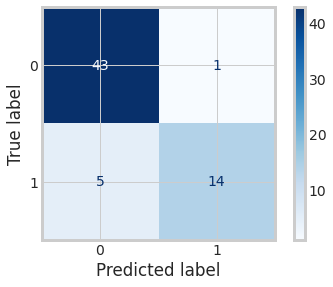

In [ ]:
disp = plot_confusion_matrix(grid_search.best_estimator_, X_test, y_test,
                                 cmap=plt.cm.Blues)
                                 
plt.show()